# Deep-learning Lab
___

### Imports

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import random as rnd
import shutil
import cv2

rnd.seed(42)

## Ploting 10 random images

['10476', '1824', '409', '12149', '4506', '4012', '3657', '2286', '12066', '1679']


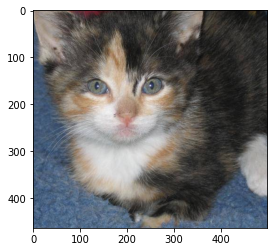

In [2]:
data_dir = os.path.abspath("../Labs/original_data/train/train")
cat_img = plt.imread(f"{data_dir}/cat.2857.jpg")

rand_cat_img = [str(rnd.randint(0, 12499)) for _ in range(5)]
rand_dog_img = [str(rnd.randint(0, 12499)) for _ in range(5)]
animal_list = rand_cat_img + rand_dog_img
print(animal_list)

plt.imshow(cat_img)

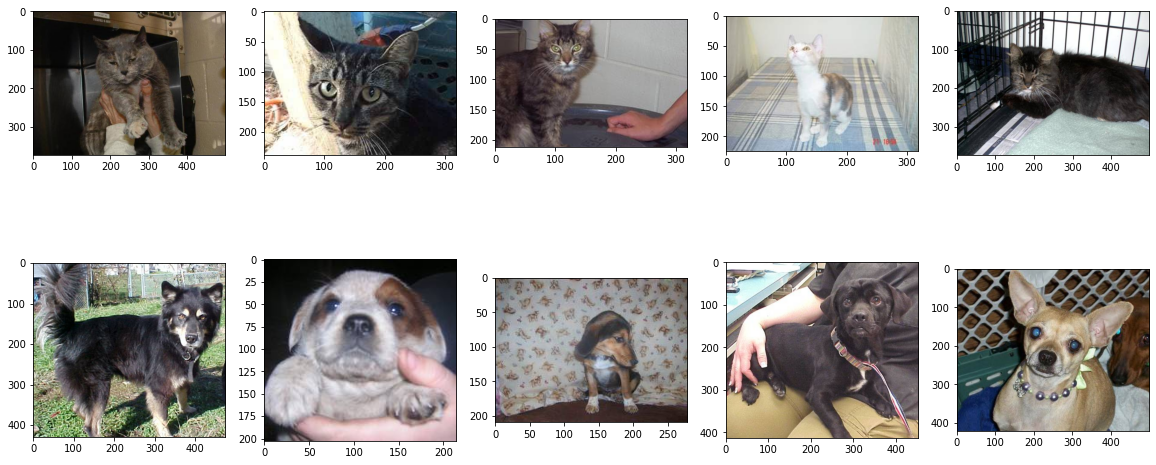

In [3]:
fig, axes = plt.subplots(2, 5, figsize = (20, 9))
    
for i, ax in enumerate(axes.flatten()):
    if i < 5:
        cat_img = plt.imread(f"{data_dir}\cat.{animal_list[i]}.jpg")
        ax.imshow(cat_img)
    else:
        dog_img = plt.imread(f"{data_dir}\dog.{animal_list[i]}.jpg")
        ax.imshow(dog_img)

## Folder creation

In [4]:
current_dir = os.path.abspath("")
print(current_dir)

child_folder_names = ["test", "train", "val"]

## Checks if the created folder already exists
try:
    os.mkdir(f"{current_dir}/experimental_small_data") ## Creats a new folder under labs
except FileExistsError as err: ## Prints error message if it already exists
    print(err)

try:
    for i in child_folder_names: ## Creats three new child forlders to the parent folder created above
        os.mkdir(f"{current_dir}/experimental_small_data/{i}")
except FileExistsError as err:
    print(err)

c:\Users\FabianAndersson-AIU2\Documents\GitHub\Deep_learning_Fabian_Andersson\Labs
[WinError 183] Det går inte att skapa en fil som redan finns: 'c:\\Users\\FabianAndersson-AIU2\\Documents\\GitHub\\Deep_learning_Fabian_Andersson\\Labs/experimental_small_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'c:\\Users\\FabianAndersson-AIU2\\Documents\\GitHub\\Deep_learning_Fabian_Andersson\\Labs/experimental_small_data/test'


In [5]:
cat_train_index = []
dog_train_index = []
cat_test_index = []
dog_test_index = []
cat_val_index = []
dog_val_index = []

image_numbers = []

## Randoms out 2500 unique images and adds them to a list 
while len(image_numbers) < 2500:
    rand_numbers = [str(rnd.randint(0, 12499)) for _ in range(2500 - len(image_numbers))]
    [image_numbers.append(item) for item in rand_numbers if item not in image_numbers]

## Creats smaller lists from the above created list
for i, item in enumerate(image_numbers):
    if i < 800:
        cat_train_index.append(item)

    if i >= 800 and i < 1600:
        dog_train_index.append(item)

    if i >= 1600 and i < 1800:
        cat_test_index.append(item)

    if i >= 1800 and i < 2000:
        dog_test_index.append(item)

    if i >= 2000 and i < 2250:
        cat_val_index.append(item)

    if i >= 2250:
        dog_val_index.append(item)    
    
print(len(image_numbers))
print(len(cat_train_index))
print(len(dog_train_index))
print(len(cat_test_index))
print(len(dog_test_index))
print(len(cat_val_index))
print(len(dog_val_index))

2500
800
800
200
200
250
250


In [6]:
## Creats paths for folders
train_data_dir = os.path.abspath("../Labs/original_data/train/train") 
experiment_train_data_dir = os.path.abspath("../Labs/experimental_small_data/train")
experiment_test_data_dir = os.path.abspath("../Labs/experimental_small_data/test")
experiment_val_data_dir = os.path.abspath("../Labs/experimental_small_data/val")

def image_mover(image_list, source_path, target_path, animal):
    """Moves pictures from source path to target path based on items in image list"""
    for item in image_list:
        shutil.copyfile(f"{source_path}/{animal}.{item}.jpg", f"{target_path}/{animal}.{item}.jpg")

## Uses the image_mover and test_image_mover the make copies of the images in the specified file directories
image_mover(cat_train_index, train_data_dir, experiment_train_data_dir, "cat")
image_mover(dog_train_index, train_data_dir, experiment_train_data_dir, "dog")
image_mover(cat_test_index, train_data_dir, experiment_test_data_dir, "cat")
image_mover(dog_test_index, train_data_dir, experiment_test_data_dir, "dog")
image_mover(cat_val_index, train_data_dir, experiment_val_data_dir, "cat")
image_mover(dog_val_index, train_data_dir, experiment_val_data_dir, "dog")

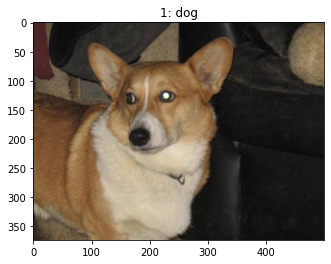

In [19]:
y_train_val = []
y_train_val_labels = []
train_files = []
X_train_val_imgs = []

train_files = os.listdir(experiment_train_data_dir) ## Loads all the file names from the train data folder
rnd.shuffle(train_files) ## Shuffels the list to make it random

[y_train_val_labels.append(i[:3]) for i in train_files] ## Extracts the first three words from file name for the labels
y_train_val = np.array([0 if i == "cat" else 1 for i in y_train_val_labels]) ## creats a list of label numbers | Cat = 0, Dog = 1

for item in train_files:
    img = plt.imread(f"{experiment_train_data_dir}/{item}")
    X_train_val_imgs.append(img)

plt.imshow(X_train_val_imgs[0])
plt.title(f"{y_train_val[0]}: {y_train_val_labels[0]}");

In [8]:
y_val_labels = []
y_val = []
X_val_files = []
X_val_imgs = []

y_test_labels = []
y_test = []
X_test_files = []
X_test_imgs = []

## Loads and reads the val data
X_val_files = os.listdir(experiment_val_data_dir)
rnd.shuffle(X_val_files)

[y_val_labels.append(i[:3]) for i in X_val_files]
y_val = np.array([0 if i == "cat" else 1 for i in y_val_labels])

for item in X_val_files:
    img = plt.imread(f"{experiment_val_data_dir}/{item}")
    X_val_imgs.append(img)


## Loads and reads the test data
X_test_files = os.listdir(experiment_test_data_dir)
rnd.shuffle(X_test_files)

[y_test_labels.append(i[:3]) for i in X_test_files]
y_test = np.array([0 if i == "cat" else 1 for i in y_test_labels])

for item in X_test_files:
    img = plt.imread(f"{experiment_test_data_dir}/{item}")
    X_test_imgs.append(img)

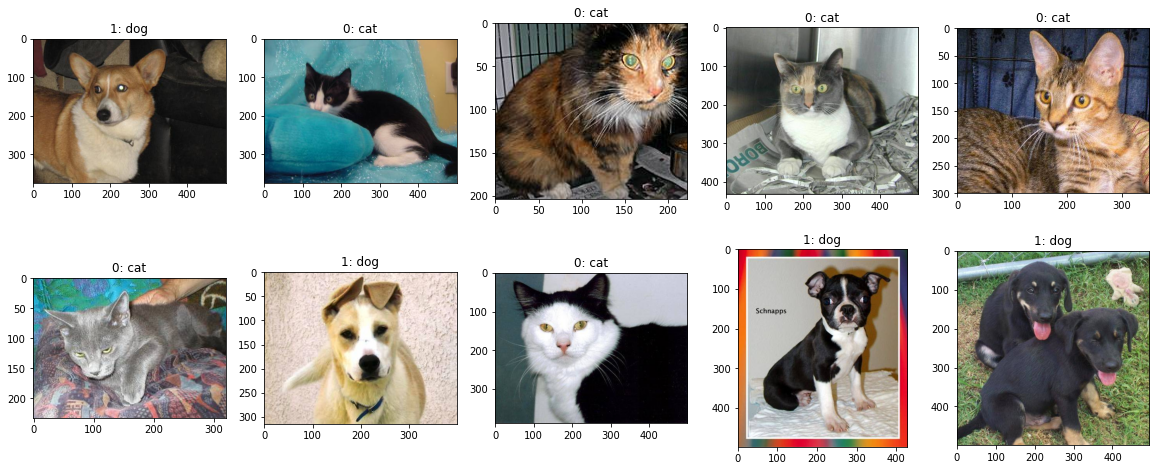

In [20]:
def image_plotter(data):
    fig, axes = plt.subplots(2,5, figsize = (20,8))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i])
        ax.set(title = (f"{y_train_val[i]}: {y_train_val_labels[i]}"))

image_plotter(X_train_val_imgs)

<AxesSubplot:ylabel='Count'>

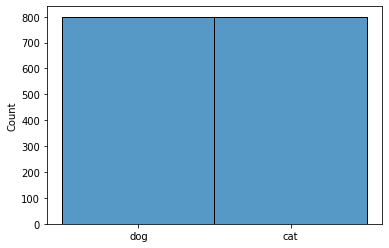

In [10]:
sns.histplot(y_train_val_labels)

## Bild behandling
___

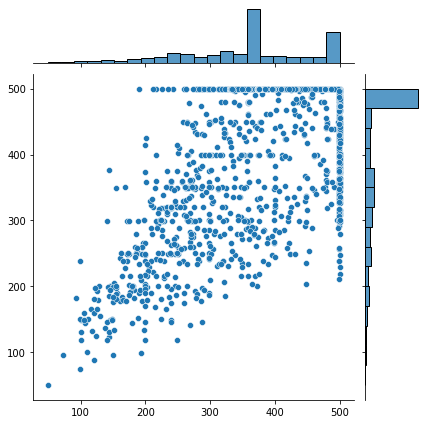

In [11]:
X_shape = []
y_shape = []

## Takes the shape of the images and returns an list for the X_shapes and y_shapes
for i in X_train_val_imgs:
    X_shape.append(i.shape[0])
    y_shape.append(i.shape[1])

sns.jointplot(x = X_shape, y = y_shape);

In [22]:
resized_X_train_imgs = []
resized_X_val_imgs = []
resized_X_test_imgs = []
new_img_shape = (360, 500) ## Creats a tuple to be used as the new size for the images

## Changes the size of all the image to make them unified
for item in X_train_val_imgs:
    resized_img = cv2.resize(item, new_img_shape)
    resized_X_train_imgs.append(resized_img)

for item in X_val_imgs:
    resized_img = cv2.resize(item, new_img_shape)
    resized_X_val_imgs.append(resized_img)

for item in X_test_imgs:
    resized_img = cv2.resize(item, new_img_shape)
    resized_X_test_imgs.append(resized_img)

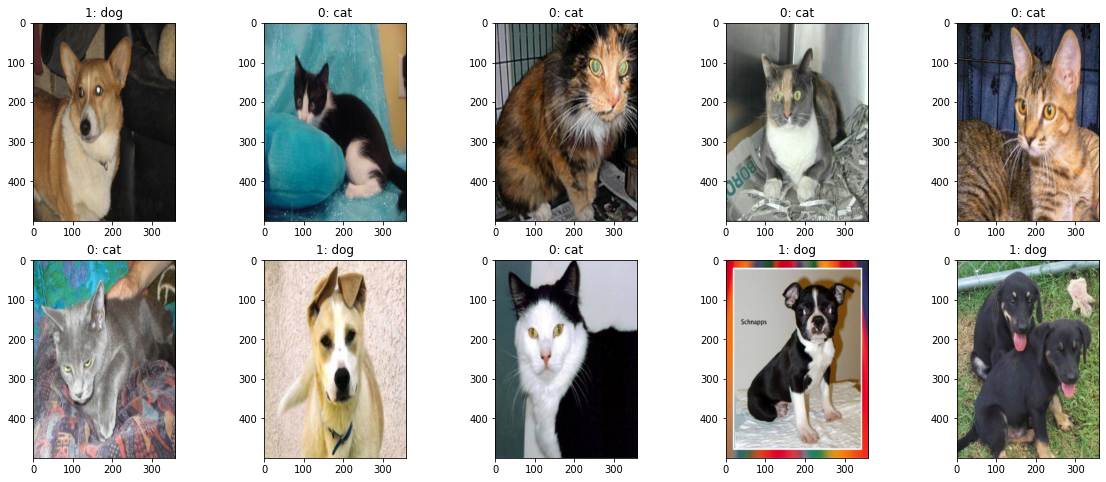

In [23]:
image_plotter(resized_X_train_imgs)

In [24]:
## Creats a new numpy array for all the images
X_train_val = np.zeros((len(resized_X_train_imgs), 500, 360, 3))
X_val = np.zeros((len(resized_X_val_imgs), 500, 360, 3))
X_test = np.zeros((len(resized_X_test_imgs), 500, 360, 3))

## Addes the images to the arrays and normalizes thier values
for i, img in enumerate(resized_X_train_imgs):
    X_train_val[i, :, :, :] = img/255

for i, img in enumerate(resized_X_val_imgs):
    X_val[i, :, :, :] = img/255

for i, img in enumerate(resized_X_test_imgs):
    X_test[i, :, :, :] = img/255

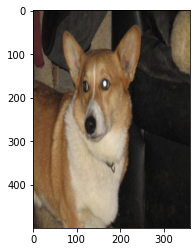

In [25]:
plt.imshow(X_train_val[0])

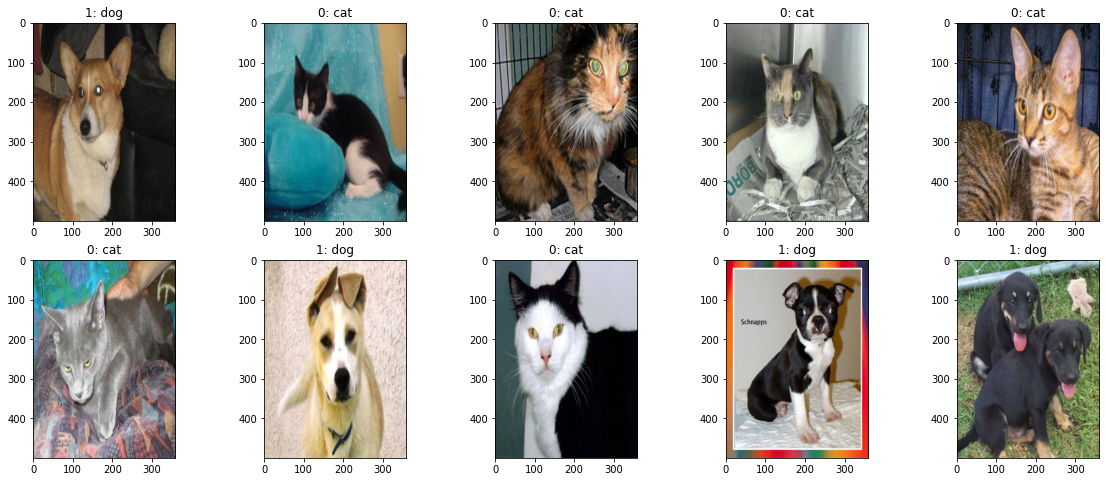

In [26]:
image_plotter(X_train_val)

### Data Augmentaion
- Creats new images from already existing once
- Expande the training data without collecting new data

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Creats an ImageDataGenerator object to create augmented images for use as data
train_img_generator = ImageDataGenerator(
    rotation_range = 33,
    shear_range = 0.2,
    horizontal_flip = True
)

## Creats an empty ImageDataGenerator object to create more non augmented images for use as data
val_img_generator = ImageDataGenerator()


X_train_val_gen_imgs = train_img_generator.flow(x = X_train_val, y = y_train_val_labels) ## Creats batches of augmented images based on the given images
X_val_gen = val_img_generator.flow(x = X_val, y = y_val_labels) ## Creats batches of images with no augments based on the given images
X_test_gen = val_img_generator.flow(x = X_test, y = y_test_labels)

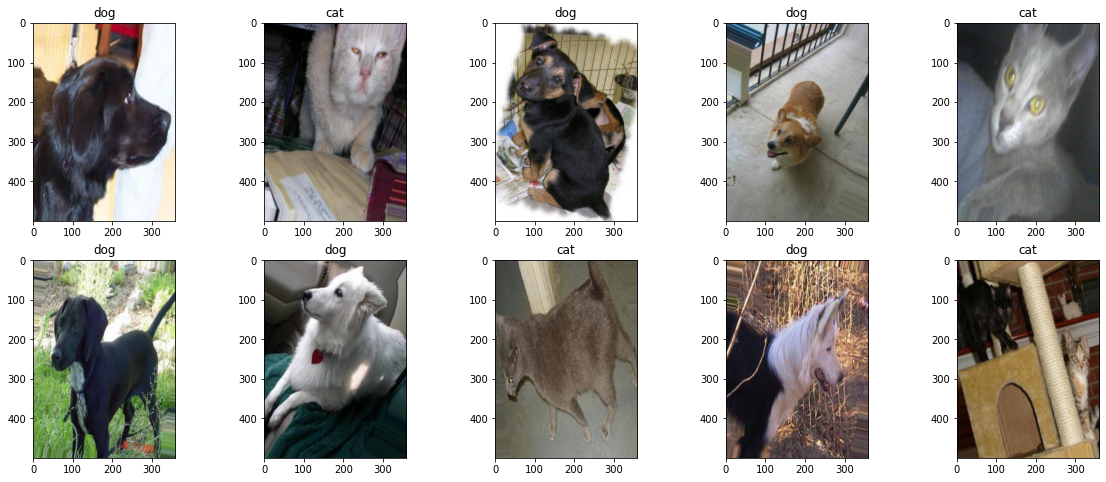

In [18]:
imgs_to_use = X_train_val_gen_imgs.next() ## Jumps to next batch

fig, axes = plt.subplots(2, 5, figsize=(20,8))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(imgs_to_use[0][i])
    ax.set(title = imgs_to_use[1][i])

In [33]:
from tensorflow.keras.applications import Xception

input_shape = (500, 360, 3)

base_model = Xception(weights = "imagenet", include_top = False, input_shape = (input_shape))

base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 500, 360, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 249, 179, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 249, 179, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(.5),
    Dense(256, activation = "relu", kernel_initializer = "he_normal"),
    Dropout(.5),
    Dense(2, activation = "softmax")
], name = "Xception_transfer")

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"])

model.summary()

Model: "Xception_transfer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 16, 12, 2048)      20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 0)                 0         
                                                                 
 dense_4 (Dense)             (None, 256)               256       
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                 